In [1]:
#importing libraries
import csv
import math 
import pandas as pd
import seaborn as sns
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import colors as mcolors 

from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

# To print data in tabular format
from tabulate import tabulate

#Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading user-rating data file 
movies_rating = pd.read_csv('./data/u1.data', sep='\t')
movies_rating['movieid']=movies_rating['movieid'].astype(int)

In [3]:
display(movies_rating)

,userid,movieid,rating,timestamp,gender,occupation,agerange
0,196,242,3,881250949,M,farmer,1
1,186,302,3,891717742,M,farmer,18
2,22,377,1,878887116,F,sales/marketing,1
3,244,51,2,880606923,M,lawyer,25
4,166,346,1,886397596,M,artist,50
...,...,...,...,...,...,...,...
99995,880,476,3,880175444,F,sales/marketing,56
99996,716,204,5,879795543,M,lawyer,25
99997,276,1090,1,874795795,M,sales/marketing,50
99998,13,225,2,882399156,M,self-employed,35


In [4]:
movies_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
userid        100000 non-null int64
movieid       100000 non-null int32
rating        100000 non-null int64
timestamp     100000 non-null int64
gender        100000 non-null object
occupation    100000 non-null object
agerange      100000 non-null int64
dtypes: int32(1), int64(4), object(2)
memory usage: 5.0+ MB


In [5]:
movies_rating.describe()

,userid,movieid,rating,timestamp,agerange
count,100000.00000,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,462.48475,425.530130,3.529860,8.835289e+08,32.761720
std,266.61442,330.798356,1.125674,5.343856e+06,18.056779
min,1.00000,1.000000,1.000000,8.747247e+08,1.000000
25%,254.00000,175.000000,3.000000,8.794487e+08,18.000000
50%,447.00000,322.000000,4.000000,8.828269e+08,35.000000
75%,682.00000,631.000000,4.000000,8.882600e+08,50.000000
max,943.00000,1682.000000,5.000000,8.932866e+08,56.000000


### I want to find out each movie average rating 

In [6]:
#getting average rating of each movie
avgRatingsMovies = movies_rating.groupby('movieid').mean()
avgRatingsMovies.drop(['userid','timestamp','agerange'], axis=1, inplace=True)
display(avgRatingsMovies)

,rating
movieid,
1,3.878319
2,3.206107
3,3.033333
4,3.550239
5,3.302326
...,...
1678,1.000000
1679,3.000000
1680,2.000000


### Now when I get each movie average rating then, I'll try to plot the graph.

[Text(0, 0.5, 'Avg. Rating'),
 Text(0.5, 0, 'Movies ID'),
 Text(0.5, 1.0, 'All Movies Average Rating')]

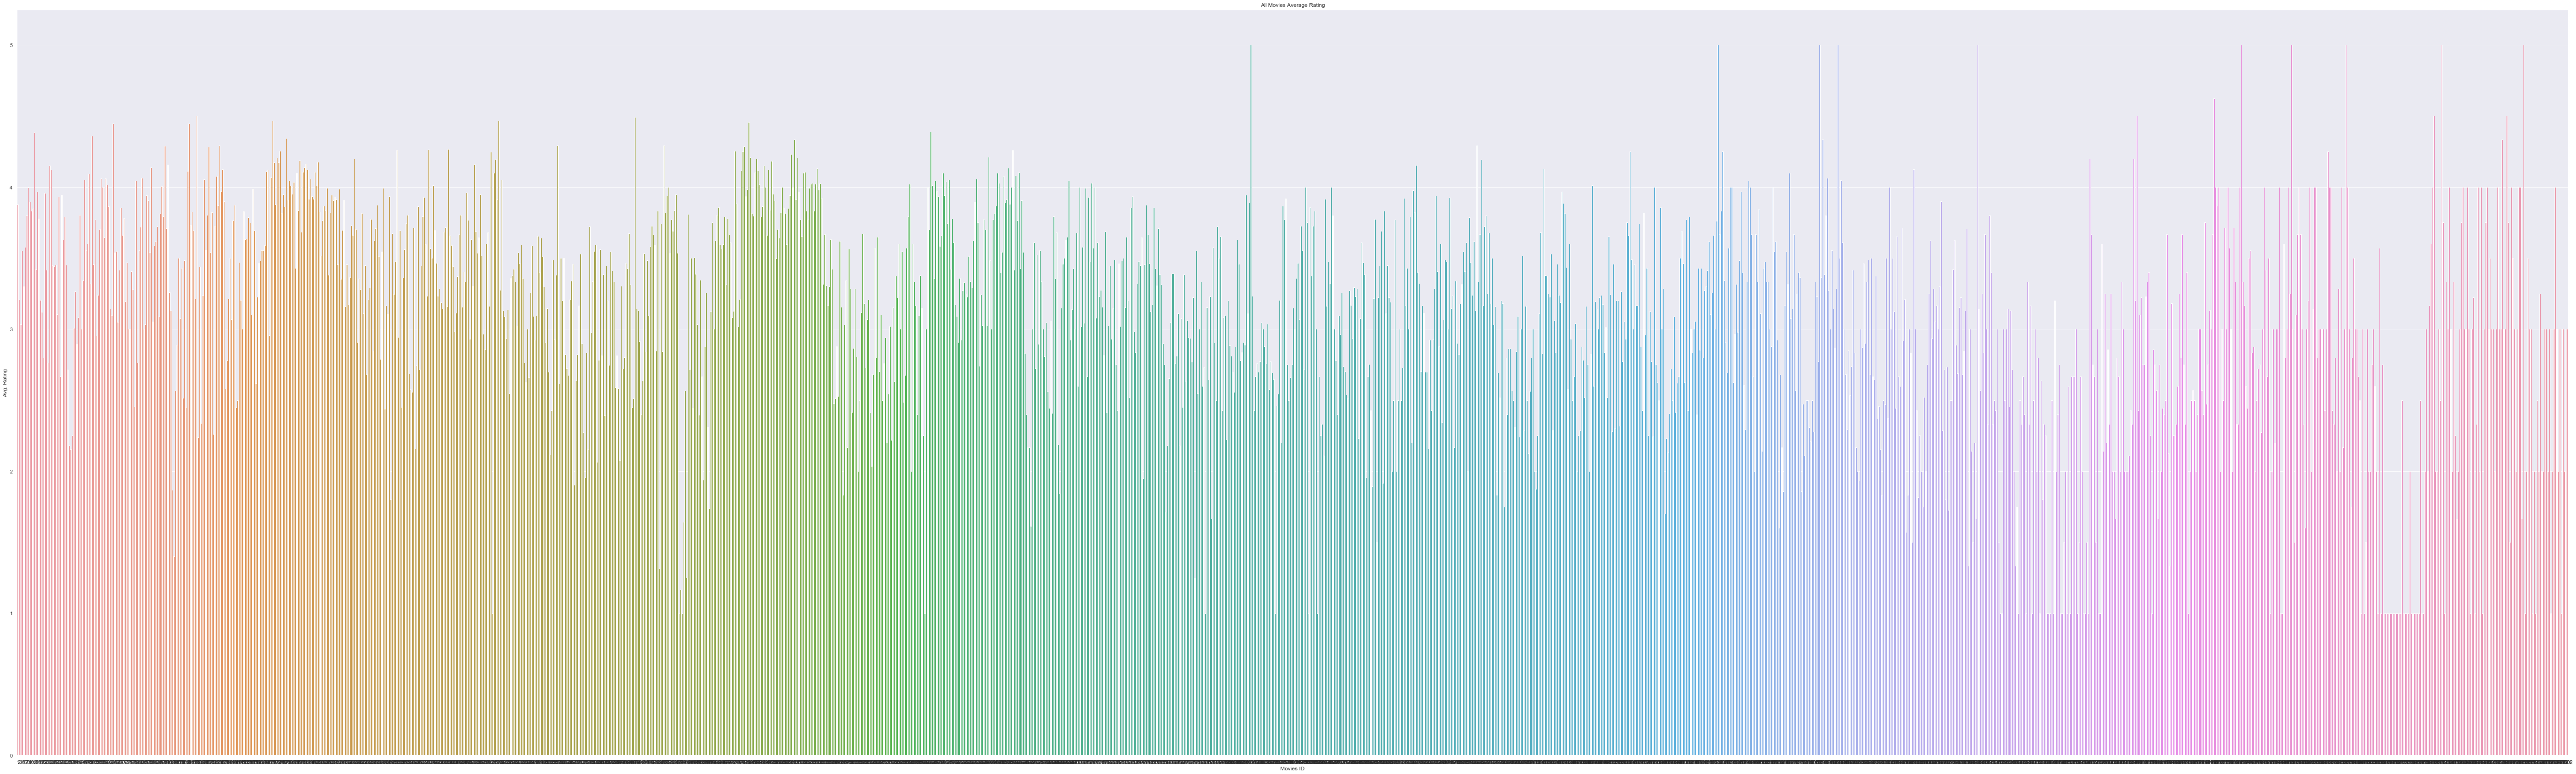

In [7]:
#plotting graph of each movie rating
sns.set(rc={'figure.figsize':(100,30)})
ax = sns.barplot(x=avgRatingsMovies.index, y=avgRatingsMovies.rating)
ax.set(xlabel='Movies ID', ylabel='Avg. Rating', title='All Movies Average Rating')

### Only movies' rating data is not enough. 

#### Now, reading movie details from another csv file which contains movie-id, title,releasedate, genre etc.


In [8]:
#reading movies data file 
movies =[]
with open('./data/u.item', 'r') as f:
    reader = csv.reader(f, dialect='excel', delimiter='|')
    for row in reader:
        movies.append(row)
        
movies_df = pd.DataFrame(movies,columns =['movieid','movietitle','releasedate','videoreleasedate','IMDbURL','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','FilmNoir','Horror','Musical','Mystery','Romance','SciFi','Thriller','War','Western'])

In [9]:
display(movies_df)

,movieid,movietitle,releasedate,videoreleasedate,IMDbURL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### I want to count the number of movies by there genre. So I'll group the above data-frame according to movie genre.

* ### Then I'll plot that data in a bar-graph for better visulizattion.

[Text(0, 0.5, 'Number of Movies'),
 Text(0.5, 0, 'Genre'),
 Text(0.5, 1.0, 'Movies List by Genre from 1922 - 1998')]

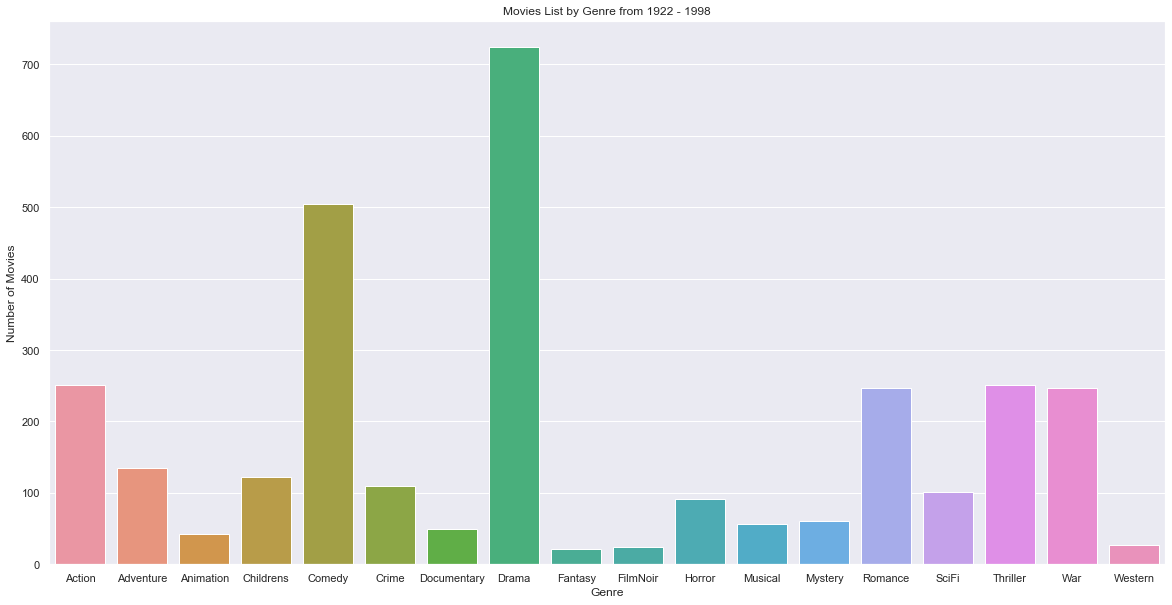

In [10]:
#converting releasedate column into date-time format
movies_df['releasedate']= pd.to_datetime(movies_df['releasedate'])

#converting below columns into type int
movies_df = movies_df.astype({'movieid':int, 'Action':int,'Adventure':int,'Animation':int,'Childrens':int,'Comedy':int,'Crime':int,'Documentary':int,'Drama':int,'Fantasy':int,'FilmNoir':int,'Horror':int,'Musical':int,'Mystery':int,'Romance':int,'SciFi':int,'Thriller':int,'War':int,'Western':int})

#getting sum of movie by genre
Action = sum(movies_df['Action'])
Adventure = sum(movies_df['Adventure'])
Animation = sum(movies_df['Animation'])
Childrens = sum(movies_df['Childrens'])
Comedy = sum(movies_df['Comedy'])
Crime = sum(movies_df['Crime'])
Documentary = sum(movies_df['Documentary'])
Drama = sum(movies_df['Drama'])
Fantasy = sum(movies_df['Fantasy'])
FilmNoir = sum(movies_df['FilmNoir'])
Horror = sum(movies_df['Horror'])
Musical = sum(movies_df['Musical'])
Mystery = sum(movies_df['Mystery'])
Romance = sum(movies_df['Romance'])
SciFi = sum(movies_df['SciFi'])
Thriller = sum(movies_df['Thriller'])
War = sum(movies_df['Romance'])
Western = sum(movies_df['Western'])

genre = ['Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','FilmNoir','Horror','Musical','Mystery','Romance','SciFi','Thriller','War','Western']
categoryNumber = [Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western]

#plotting graph by genre
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x=genre, y=categoryNumber)
ax.set(ylabel='Number of Movies', xlabel='Genre', title='Movies List by Genre from 1922 - 1998')

### Now, when I have the bar-grpah of the movies by their genre which show data in better manner. And also it's clear that Drama movies are in more number.

* ### My aim is to merge the two different data-frame to get better and more meaningfull data-frame.

* ### So I'll merge the data-frames to get a new data-frame which have, users' gender, occupation and age-range rated which movies of what genre with how much ratings.

In [11]:
#Merging two data-sets according by movie-id
clusterData = pd.merge(left=movies_rating, right=movies_df, how='left', on='movieid')

display(clusterData)

,userid,movieid,rating,timestamp,gender,occupation,agerange,movietitle,releasedate,videoreleasedate,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,196,242,3,881250949,M,farmer,1,Kolya (1996),1997-01-24,,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,M,farmer,18,L.A. Confidential (1997),1997-01-01,,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,F,sales/marketing,1,Heavyweights (1994),1994-01-01,,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,M,lawyer,25,Legends of the Fall (1994),1994-01-01,,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,M,artist,50,Jackie Brown (1997),1997-01-01,,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,F,sales/marketing,56,"First Wives Club, The (1996)",1996-09-14,,...,0,0,0,0,0,0,0,0,0,0
99996,716,204,5,879795543,M,lawyer,25,Back to the Future (1985),1985-01-01,,...,0,0,0,0,0,0,1,0,0,0
99997,276,1090,1,874795795,M,sales/marketing,50,Sliver (1993),1993-01-01,,...,0,0,0,0,0,0,0,1,0,0
99998,13,225,2,882399156,M,self-employed,35,101 Dalmatians (1996),1996-11-27,,...,0,0,0,0,0,0,0,0,0,0


### Now, when I have the clustered data, I'll group the data-frame by users' occupation, gender and age-range.

In [12]:
#grouping dataset by occupation, gender and age-range
grp = clusterData.groupby(['occupation','gender','agerange'])[genre].sum()
display(grp)


Action  Adventure  Animation  Childrens  Comedy  \
occupation   gender agerange                                                    
K-12 student F      1             79         41         11         18      87   
                    18            83         47         14         28     105   
                    25            77         43          9         22      90   
                    35            97         54         16         25     126   
                    45            95         43         10         19      97   
...                              ...        ...        ...        ...     ...   
writer       M      25            86         42         19         33      94   
                    35            95         40         15         28     100   
                    45           102         67          6         19      94   
                    50            85         44         13         27     122   
                    56            88         41         10         23     100   

                              Crime  Documentary  Drama  Fantasy  FilmNoir  \
occupation   gender agerange                                                 
K-12 student F      1            23            2    121        4         7   
                    18           26            4    122        3         4   
                    25           30            1    139        4         7   
                    35           35            2    166        4         3   
                    45           26            1    141        1         4   
...                             ...          ...    ...      ...       ...   
writer       M      25           34            5    138        5         6   
                    35           15            1    135        3         3   
                    45           30            1    152        4         5   
                    50           30            3    144        4         8   
                    56           29            2    125        2         8   

                              Horror  Musical  Mystery  Romance  SciFi  \
occupation   gender agerange                                             
K-12 student F      1             16       20       10       58     42   
                    18            22       13       16       78     47   
                    25            20       14       22       73     45   
                    35            20       14       25       73     55   
                    45            15       15       16       73     50   
...                              ...      ...      ...      ...    ...   
writer       M      25            26       21       18       58     45   
                    35            15       22       16       62     51   
                    45            17       13       22       69     46   
                    50            15       19       21       75     39   
                    56            23       16       23       64     40   

                              Thriller  War  Western  
occupation   gender agerange                          
K-12 student F      1               65   35        6  
                    18              77   26        9  
                    25              59   28        3  
                    35              84   51        3  
                    45              81   38        7  
...                                ...  ...      ...  
writer       M      25              86   22       10  
                    35              76   27        6  
                    45              81   37        7  
                    50              78   36        4  
                    56              71   26        5  

[294 rows x 18 columns]

* ### The above data-frame gives better output that which job profession people of which gender and of which age range likes what kind of movies. 

* ### This will help to give suggestion to people that what kind of movies they prefer/like to watch most.

In [13]:
'''
showing movie's genre which is mostly rated/viewed by people of which occupation, gnder and age range
Age -Range
	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
'''

maxMovie = grp.max()

mov_genre_occ_gender = []

#Most likely movie by Genre, from occupation, Fender and Age_range

for eachgenre in maxMovie.index:
    r = grp[grp[eachgenre] == grp[eachgenre].max()]
    mov_genre_occ_gender.append([eachgenre,r.index[0][0],r.index[0][1],int(r.index[0][2])])

print(tabulate(mov_genre_occ_gender,['Genre','Occupation','Gender','Age Range'],tablefmt='grid'))

+-------------+----------------------+----------+-------------+
| Genre       | Occupation           | Gender   |   Age Range |
+=============+======================+==========+=============+
| Action      | scientist            | F        |          18 |
+-------------+----------------------+----------+-------------+
| Adventure   | technician/engineer  | F        |          18 |
+-------------+----------------------+----------+-------------+
| Animation   | other                | F        |          25 |
+-------------+----------------------+----------+-------------+
| Childrens   | programmer           | M        |          45 |
+-------------+----------------------+----------+-------------+
| Comedy      | technician/engineer  | M        |          35 |
+-------------+----------------------+----------+-------------+
| Crime       | programmer           | F        |           1 |
+-------------+----------------------+----------+-------------+
| Documentary | other                | F

* ### The above result shows which professions' people like what kind of movies most.

* ### Its also showing the gender and age-range of the users.

* ### It'll be different for the different age-range users.

[None, None]

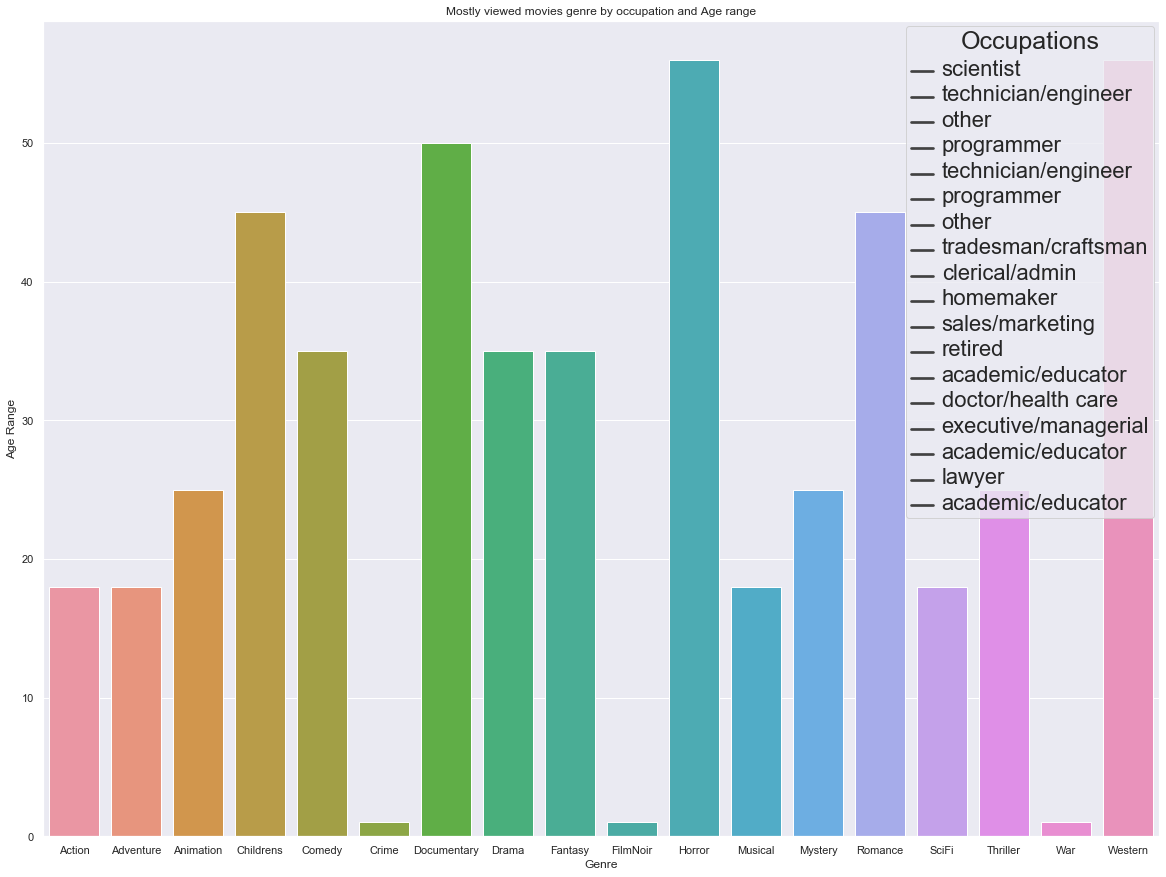

In [14]:
mov_genre_occ_gender = pd.DataFrame(mov_genre_occ_gender)
#plotting graph by genre
sns.set(rc={'figure.figsize':(20,15)})

ax = sns.barplot(x=genre, y=mov_genre_occ_gender[3])
ax.set(ylabel='Age Range', xlabel='Genre', title='Mostly viewed movies genre by occupation and Age range')
h, l = ax.get_legend_handles_labels()

ax.legend(title='Occupations', loc='upper right', labels=mov_genre_occ_gender[1],markerscale=20)
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='25') # for legend title


* ### Now I have plotted the result of above in bar-plot.

In [15]:
#Options1 for users
'''
suppose a user wants to find out which movie's genre mostly like by a 'Female homemaker of age b/w 35-44)'

Age -Range
	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"
    
#The result would be like below 
'''

occupation = 'homemaker'
gender = 'F'
agerange  = '35'

if gender == 'M':
    gen = 'Male'
else:
    gen = 'Female'
    
mov_gen = max(grp.loc[(grp.index.get_level_values('occupation') == occupation) & 
                (grp.index.get_level_values('gender') == gender) & 
                (grp.index.get_level_values('agerange') == agerange)])

print(gen,occupation, 'of age range',agerange,'likes',mov_gen,'movies')

Female homemaker of age range 35 likes Western movies


* ### The above code will help to give the result of a query, where when I give occupation, gender and agerange. It will give the most likely movies genre.

In [16]:
#Options2 for users
'''
suppose a user wants to find out what type of peoples like crime type movies
'''

mov_gen = 'Crime'

r = grp[grp[mov_gen] == grp[mov_gen].max()].index

if r[0][1] == 'M':
    gen = 'Male'
else:
    gen = 'Female'
  
print(mov_gen, 'type movies mostly watched by', gen, r[0][0], 'of age range', r[0][2])


Crime type movies mostly watched by Female programmer of age range 1


* ### Next, the above code will help to give the result of a query where when I give a movie genre, it will give the result that what profession people of what age range and gender like this genres' movie.

In [17]:
#converting release date into year
movies_df['releasedate']= movies_df['releasedate'].dt.year

#group by year and sum of all movies by year
movies_df = movies_df.groupby(['releasedate'])[genre].sum()

display(movies_df)


,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
releasedate,,,,,,,,,,,,,,,,,,
1922.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994.0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995.0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996.0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


* ### The above data-frame shows number of movies of which genre in which year are released. This will help to give an idea about what kind of movies released most in which year or decade.

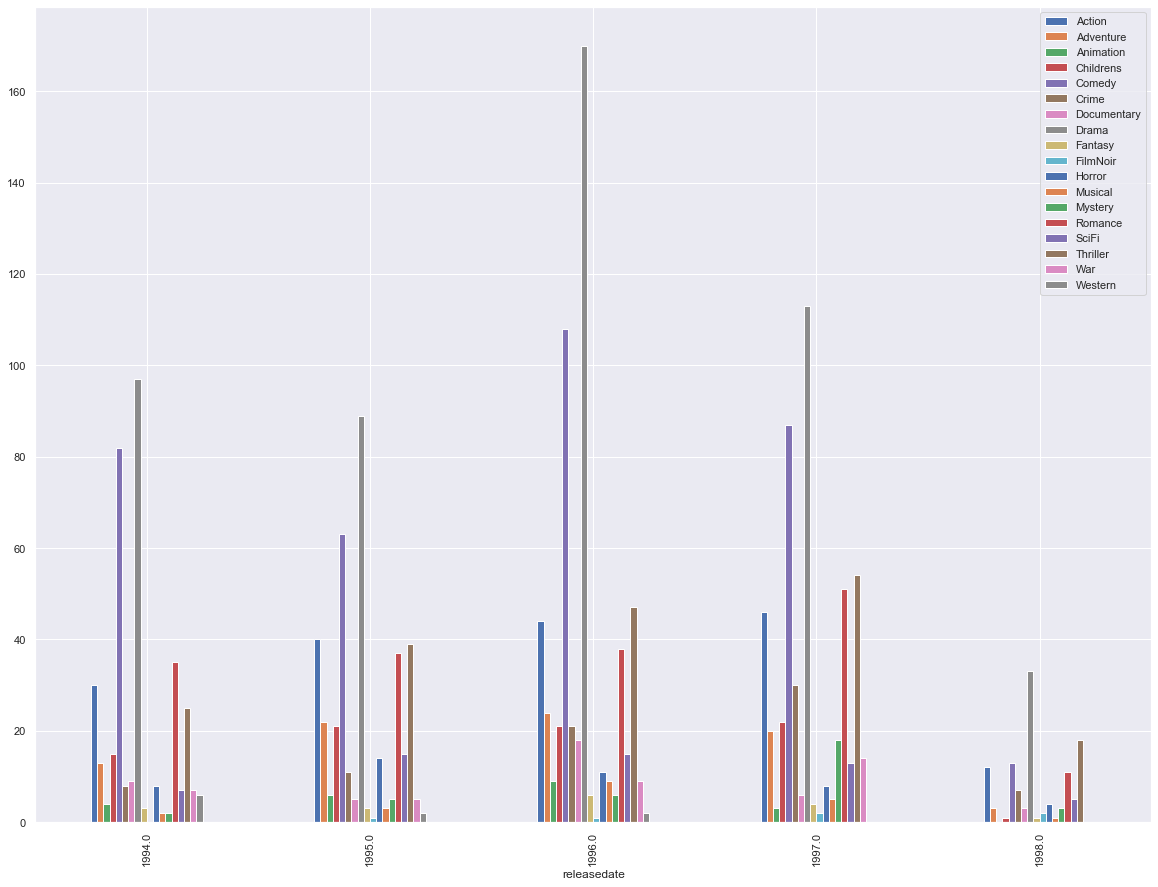

In [18]:
#getting number of movies between 1990 and 1998
movies_1990s = movies_df[(movies_df.index >= 1994) & (movies_df.index <= 1998) ]
movies_1990s.plot(kind="bar")

* ### It will be not clear if we plot the whole data-frame. That's why I have plotted data from 1994 to 1998. For e.g. in the year 1994 Drama movies are mostly relased and comedy movies are behind that.

### So far I have plotted different kind of bar-plot on different dataset to visualize the data in different manner and more meaningful.

---

### Now I'm going to apply some of the cluster methods on the dataset.

* #### First I'm going to use K-Means Clustering for two dimensional data-set.

In [19]:
#K-Means Clustering

#taking two-dimensional data i.e. year and Drama movie(because No. of drama movie is more)
Data = {'x': movies_df.index,
        'y':  movies_df.Drama}

df = pd.DataFrame(Data,columns=['x','y'])

display(df)
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
display(centroids)


,x,y
releasedate,,
1922.0,1922.0,0
1926.0,1926.0,1
1930.0,1930.0,1
1931.0,1931.0,0
1932.0,1932.0,0
...,...,...
1994.0,1994.0,97
1995.0,1995.0,89
1996.0,1996.0,170


array([[1.97715152e+03, 4.33333333e+00],
       [1.99500000e+03, 1.06600000e+02],
       [1.94372727e+03, 1.48484848e+00]])

* ### Tabulating and Visualizing the results

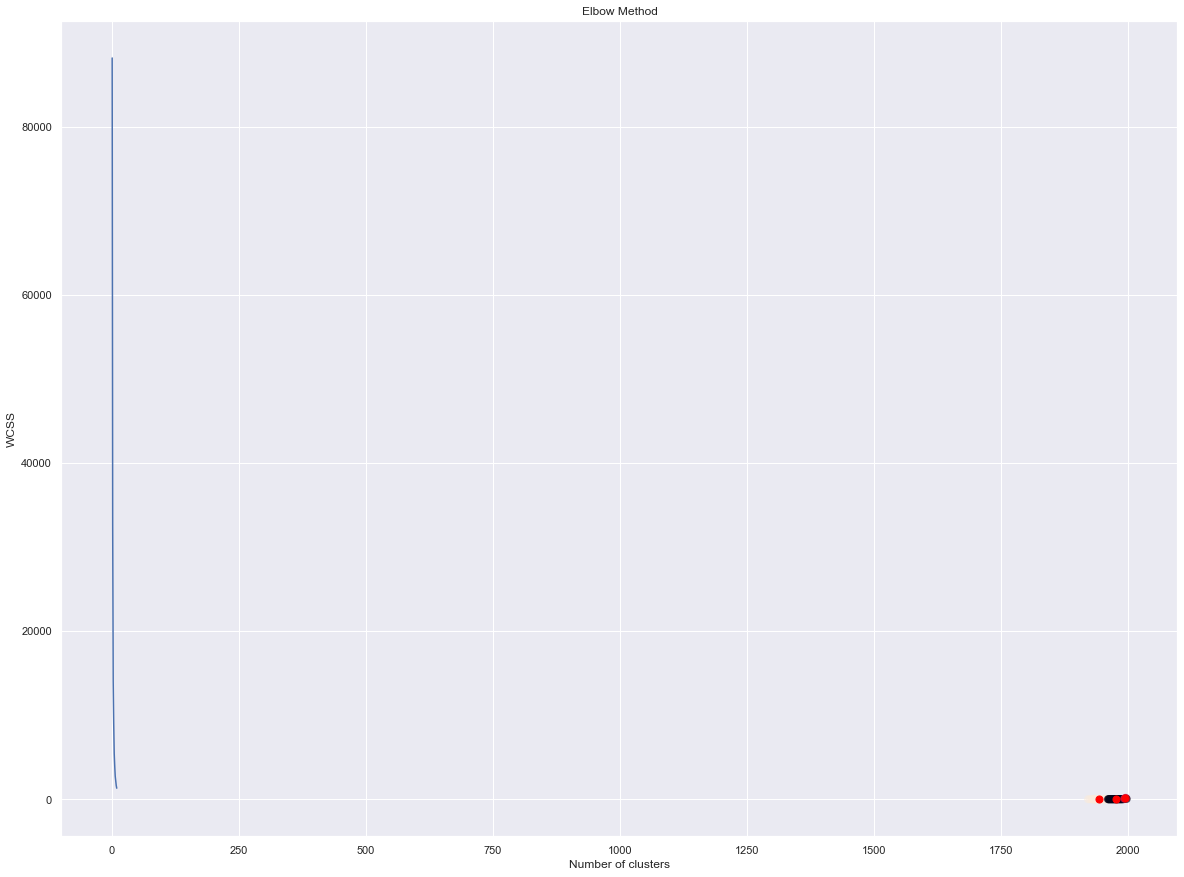

In [20]:
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

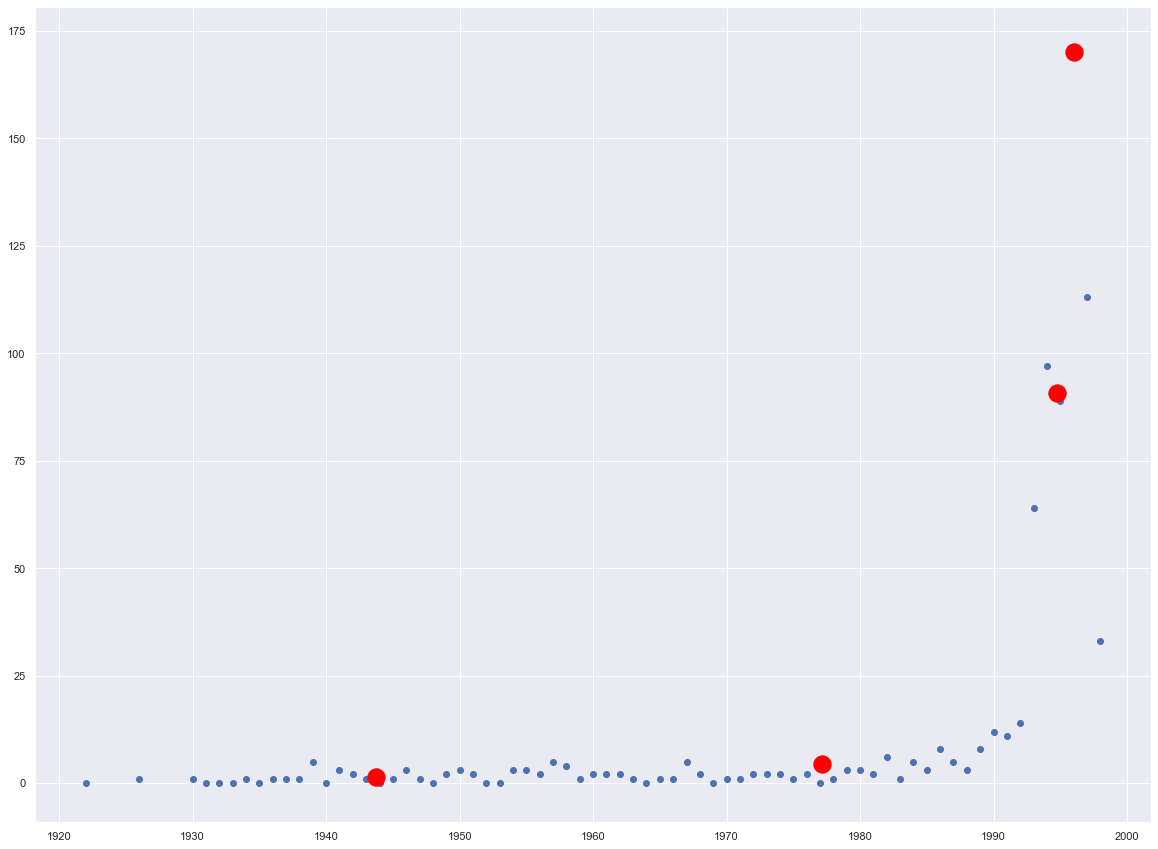

In [21]:
#k-mean
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
plt.scatter(df['x'], df['y'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

* ### Now i'm going to use K-mean method for multidimensional data.

#### As the data we have is based on the number of movies of different genres, we can classify movies into different groups(clusters) or subgroups using some well known clustering techniques. For sake of simplicity, KMeans clustering ought to be a better option in this case.

array([10, 10, 10, 15, 10, 10, 10, 10, 10,  3, 10, 11, 12,  3, 10, 10, 15,
        3, 15, 15, 15,  3,  3,  3, 10, 10, 16, 10, 10, 11, 16, 12, 12,  3,
       15,  3, 10, 12, 10, 11,  3, 10, 10, 12, 10, 10, 12, 12, 10,  3, 10,
       16, 16,  0, 11, 10, 16, 16,  9, 13, 16,  9, 14, 17,  6,  4,  1,  8,
        2,  5,  7])

,0,1,2
0,-14.337494,-0.303122,0.077234
1,-13.674938,-0.846332,-0.315926
2,-13.674938,-0.846332,-0.315926
3,-14.035850,0.386034,-0.586684
4,-14.113511,0.181822,0.434203


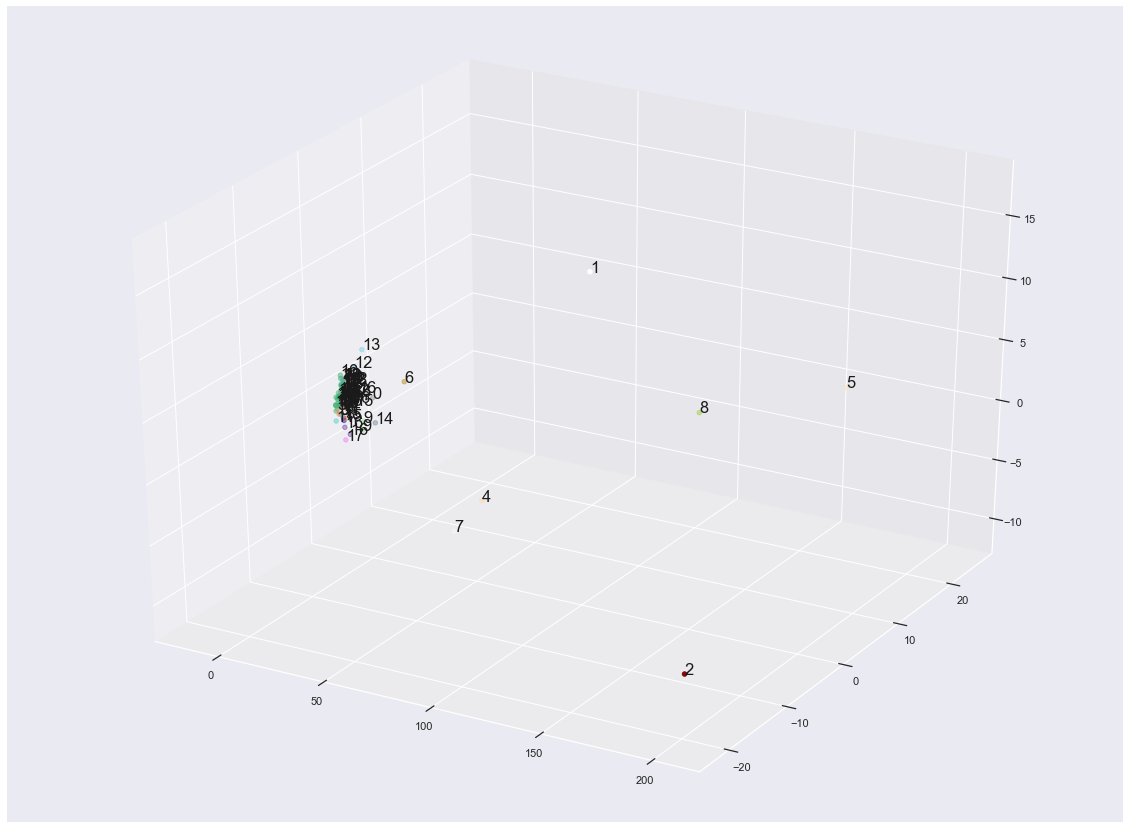

In [22]:
'''
Multidimensional data
'''
clusters = 18
  
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(movies_df) 
  
display(kmeans.labels_)
pca = PCA(3) 
pca.fit(movies_df) 
  
pca_data = pd.DataFrame(pca.transform(movies_df)) 
  
display(pca_data.head())

   
''' Generating different colors in ascending order  
                                of their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 
   
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show() 

* ### The code above generates a 3D scatter plot where each data point has a color related to its corresponding cluster.

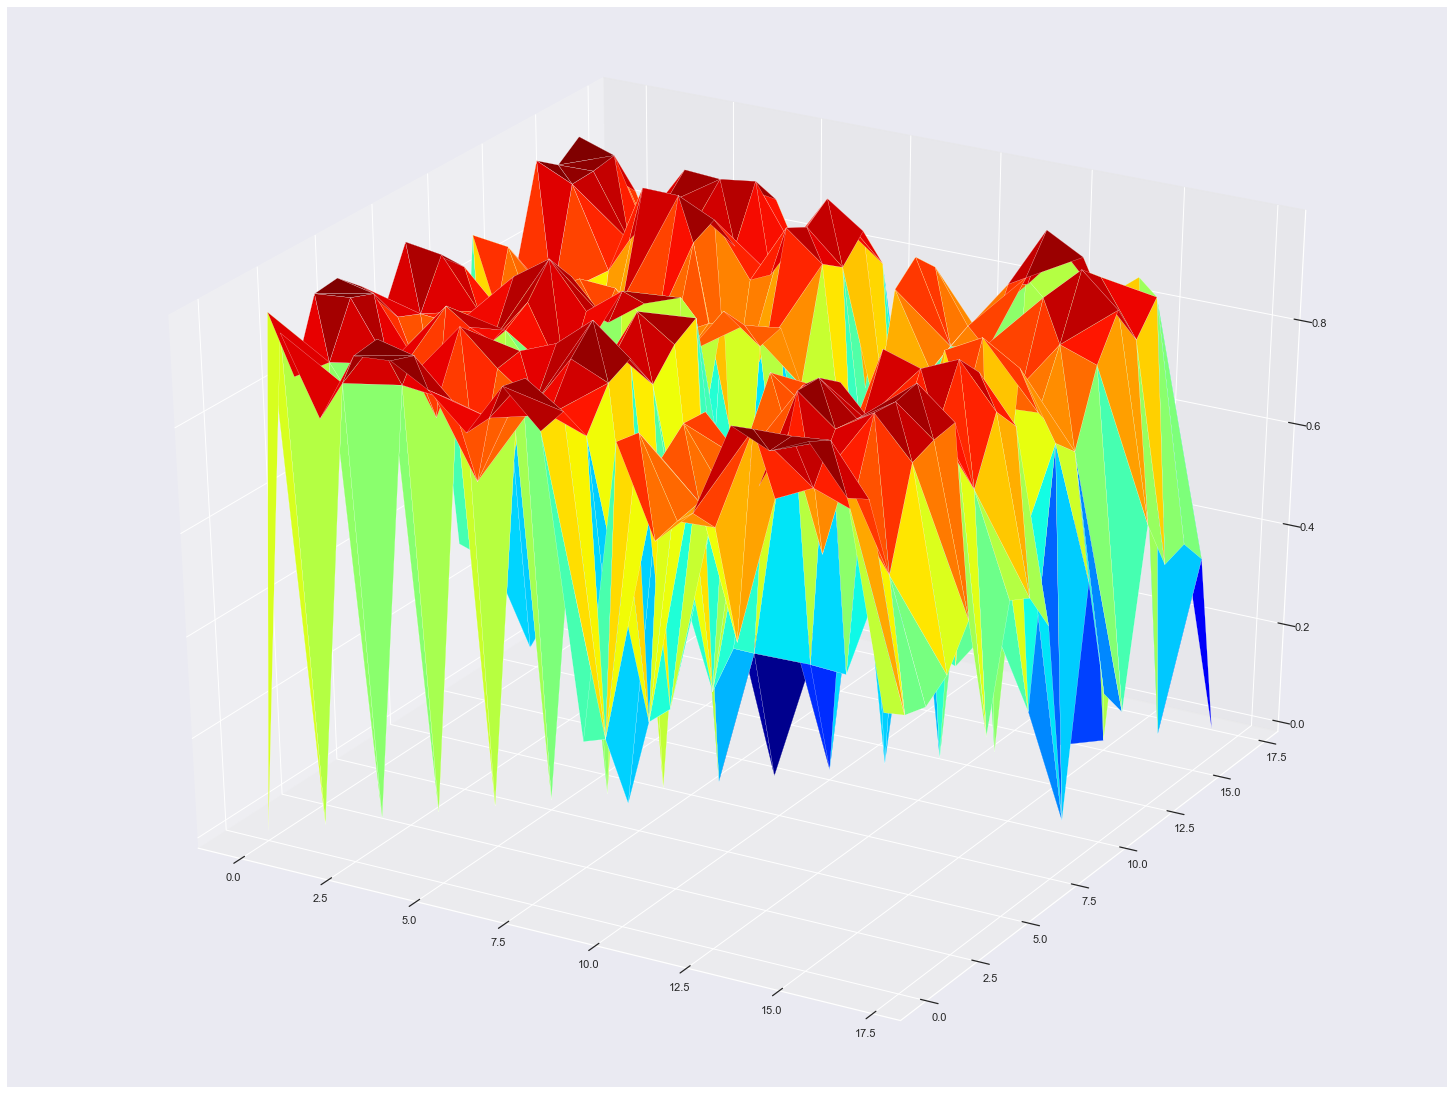

In [23]:
# generating correlation data 
df = movies_df.corr() 
df.index = range(0, len(df)) 
df.rename(columns = dict(zip(df.columns, df.index)), inplace = True) 
df = df.astype(object) 
  
''' Generating coordinates with  
corresponding correlation values '''
for i in range(0, len(df)): 
    for j in range(0, len(df)): 
        if i != j: 
            df.iloc[i, j] = (i, j, df.iloc[i, j]) 
        else : 
            df.iloc[i, j] = (i, j, 0) 
  
df_list = [] 
  
# flattening dataframe values 
for sub_list in df.values: 
    df_list.extend(sub_list) 
  
# converting list of tuples into trivariate dataframe 
plot_df = pd.DataFrame(df_list) 
  
fig = plt.figure() 
ax = Axes3D(fig) 
# plotting 3D trisurface plot 
ax.plot_trisurf(plot_df[0], plot_df[1], plot_df[2],  
                    cmap = cm.jet, linewidth = 0.2) 
  
plt.show() 

### Running cluster analysis again on the subsetted feature set, we can generate a scatter plot with better inference on how to spread different movies among various groups/genre.

---
### Summary
I took two dataset(CSV files) from different sources. My aim was to group the the different dataset to get meaningful result.

* First I took movies-rating csv file where different users' of different occupation, age-range and gender has rated different movies on movie-id and created movies_rating dataframe.
* From that dataset, I've extracted movies and average rating and plotted the bar-grpah.
* But that graph is not clear due to the more numbers of data.
* Only that dataset was not enough that is why I took another CSV file which contains movies details like name, release date, genre etc. and created movies-dataframe
* From the movies-dataframe I have group the number of movies based on the genre and plotted another bar graph on that.
* After that I merge both the dataframe which have, users gender, occupation and age-range rated which movies with how much ratings and of what genre.
* Then I group the above dataframe by users' occupation, gender and age-range which gives an idea that people prefer/like to watch what kind of movies most.
* After that, I created another dataframe from above which shows which professions' people like what kind of movies most then I've plotted another bar-grpah.
* Then next block is to give the result of a query, where when I give occupation, gender and agerange. It will give the most likely movies genre.
* After that, next block is to give the result of a query where when I give a movie genre, it will give the result that what profession people of what age range and gender like this genres' movie.
* Then group the data in manner that, number of different genre movies on year-wise.
* Then plotted a barplot from 1994-1998 on the above dataframe to  give an idea about what kind of movies released most in which year or decade.
* Then appying K-mean cluster for the two dimensional data where on x-axis year and on y-axis number of drama movies released has taken.
* And finally, K-mean clustering for multidimensional data where  number of different genre movies v/s year-wise and plotted 3D scatter plot where each data point has a color related to its corresponding cluster. Then another scatter plot with better inference.
